## Decision Tree Classifier

Decision Tree Classifiers have the same advantages and disadvantages as Decision Tree Regressors. The only difference is with the objective. We are minimizing Gini impurity:

- Gini impurity = 1 - sum(probaility of class ** 2)

You can think of gini impurity as the probability that randomly labeling an outcome is incorrect, i.e. our random guess is wrong.

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree

In [9]:
class Node:

    def __init__(self, left, right, gini_imp, feat, split, avg_class):
        self.left = left
        self.right = right
        self.gini_imp = gini_imp
        self.feat = feat
        self.split = split
        self.avg_class = avg_class


class DecisionTreeClassifer:

    def __init__(self, max_depth=3, min_samples_split=5):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    
    def calc_gini_impurity(self, data, target_col):

        labels = data[target_col].unique()

        class_dist = [len(data[data[target_col] == lbl]) for lbl in labels]

        return 1 - sum([(cls_dist/len(data))**2 for cls_dist in class_dist])

    def fit(self, data, target_col):

        self.root = self._fit(data, target_col, float("inf"), 0)
    
    def _fit(self, data, target_col, parent_gini_imp, depth):

        if len(data) < self.min_samples_split or depth >= self.max_depth:

            print(f"Leaf node. Gini {parent_gini_imp}, Prediction {data[target_col].mode()[0]}")

            return Node(None, None, parent_gini_imp, None, None, data[target_col].mode()[0])

        features = [x for x in data.columns if x != target_col]

        best_feat, best_split = None, None
        best_gini_imp = parent_gini_imp

        for feat in features:

            uniques = sorted(data[feat].unique())

            for i in range(1, len(uniques)):

                split = (uniques[i] + uniques[i - 1]) / 2

                left_region = data[data[feat] < split]
                right_region = data[data[feat] >= split]

                total_gini_imp = (len(left_region)/len(data))*self.calc_gini_impurity(left_region, target_col) + (len(right_region)/len(data))*self.calc_gini_impurity(right_region, target_col)

                if total_gini_imp < best_gini_imp:
                    
                    best_feat, best_split = feat, split
                    best_gini_imp = total_gini_imp
        
        if not best_feat:

            print(f"Leaf node. Gini {parent_gini_imp}, Prediction {data[target_col].mode()[0]}")

            return Node(None, None, best_gini_imp, None, None, data[target_col].mode()[0])
        
        node = Node(None, None, best_gini_imp, best_feat, best_split, data[target_col].mode()[0])

        print(f"Node Gini imp {best_gini_imp}, Node best feat {best_feat}, Node best split {best_split}, Node avg class {data[target_col].mode()[0]}, Node depth {depth}")
        node.left = self._fit(data[data[best_feat] < best_split], target_col, best_gini_imp, depth+1)
        node.right = self._fit(data[data[best_feat] >= best_split], target_col, best_gini_imp, depth+1)
        return node

    def predict(self, data):

        return np.array([self._predict(obs[1]) for obs in data.iterrows()])

    def _predict(self, obs):

        if not self.root:

            print("Model not fitted")

            return

        curr = self.root

        while curr.left and curr.right:

            split, feat = curr.split, curr.feat

            if obs[feat] < split:

                curr = curr.left
            
            else:

                curr = curr.right
        return curr.avg_class

In [10]:
# def mse(y_true, y_hat):

#     return np.mean((y_true - y_hat)**2)

# def rmse(y_true, y_hat):

#     return np.sqrt(np.mean((y_true - y_hat)**2))

def accuracy(y_true, y_hat):

    return sum(y_true == y_hat) / len(y_true)
    






In [11]:
np.random.seed(42)

# wines = load_wine(as_frame=True)
# data = pd.concat([wines["data"], wines["target"]], axis=1)
# data = data.sample(frac=1)
# data.reset_index(inplace=True, drop=True)
# data

breast_cancer = load_breast_cancer(as_frame=True)
data = pd.concat([breast_cancer["data"], breast_cancer["target"]], axis=1)
data = data.sample(frac=1)
data.reset_index(inplace=True, drop=True)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750,1
1,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589,0
2,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019,0
3,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359,1
4,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
565,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
566,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
567,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [12]:
train_size = 0.8

train_data = data.iloc[:int(len(data)*train_size)]
test_data = data.iloc[int(len(data)*train_size):]

target_col = "target"

print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (455, 31)
Test Data Shape:  (114, 31)


In [13]:
max_depth, min_samples = 3, 5

my_cls = DecisionTreeClassifer(max_depth, min_samples)
sklearn_cls = DTC(max_depth=max_depth, min_samples_split=min_samples)

In [14]:
my_cls.fit(train_data, target_col)
sklearn_cls.fit(train_data[[f for f in train_data.columns if f != target_col]], train_data[target_col])

Node Gini imp 0.12257130624477566, Node best feat worst area, Node best split 884.75, Node avg class 1, Node depth 0
Node Gini imp 0.08000236396140825, Node best feat worst concave points, Node best split 0.1603, Node avg class 1, Node depth 1
Node Gini imp 0.05805292609756326, Node best feat worst concave points, Node best split 0.13235, Node avg class 1, Node depth 2
Leaf node. Gini 0.05805292609756326, Prediction 1
Leaf node. Gini 0.05805292609756326, Prediction 1
Node Gini imp 0.0, Node best feat worst texture, Node best split 23.47, Node avg class 0, Node depth 2
Leaf node. Gini 0.0, Prediction 1
Leaf node. Gini 0.0, Prediction 0
Node Gini imp 0.05102040816326531, Node best feat mean concavity, Node best split 0.07214, Node avg class 0, Node depth 1
Leaf node. Gini 0.05102040816326531, Prediction 0
Node Gini imp 0.0, Node best feat mean radius, Node best split 12.725, Node avg class 0, Node depth 2
Leaf node. Gini 0.0, Prediction 0
Leaf node. Gini 0.0, Prediction 0


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [15]:
my_cls_preds = my_cls.predict(test_data)
sklearn_cls_preds = sklearn_cls.predict(test_data[[f for f in test_data.columns if f != target_col]])

pd.DataFrame(data={"Accuracy": [accuracy(test_data[target_col], my_cls_preds), accuracy(test_data[target_col], sklearn_cls_preds)]}, index=["My DTC", "Sklearn's DTC"])

,Accuracy
My DTC,0.921053
Sklearn's DTC,0.938596


[Text(0.5769230769230769, 0.875, 'worst area <= 884.75\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.3076923076923077, 0.625, 'worst concave points <= 0.16\ngini = 0.144\nsamples = 308\nvalue = [24, 284]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'worst concave points <= 0.132\ngini = 0.072\nsamples = 293\nvalue = [11.0, 282.0]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.022\nsamples = 267\nvalue = [3, 264]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.426\nsamples = 26\nvalue = [8, 18]'),
 Text(0.46153846153846156, 0.375, 'worst texture <= 23.47\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.8461538461538461, 0.625, 'mean concavity <= 0.072\ngini = 0.078\nsamples = 147\nvalue = [141.0, 6.0]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375

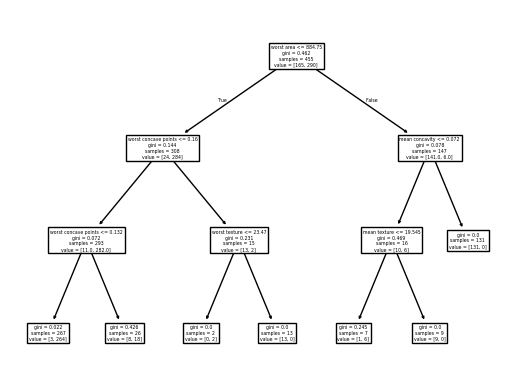

In [16]:
plot_tree(sklearn_cls, feature_names=train_data.columns)